In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
# Importing Dataset

In [4]:
dataset=pd.read_csv("account_data.csv")

In [5]:
dataset

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,53,Doctor,Divorced,0,Own,134,749,109835,2000,24,...,Normal,On-time,No,Verified,No,Desktop,No,Consistent,Referral,No
9996,56,Self-employed,Single,1,Own,1,749,65018,66029,5,...,Normal,Late,No,Verified,No,Desktop,No,Consistent,Referral,No
9997,22,Student,Single,0,Rent,85,811,0,2000,1,...,Normal,Defaulted,Yes,Not Verified,No,Mobile,No,Inconsistent,Online,Yes
9998,40,Self-employed,Single,0,Rent,1,757,6907,7352,12,...,Normal,Defaulted,No,Not Verified,No,Mobile,Yes,Inconsistent,Online,Yes


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.isnull().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

In [9]:
dataset.describe()

,Age,Dependents,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,InterestRate,PreviousLoans,ExistingLiabilities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.837900,1.323400,69.087400,768.701300,45994.615600,57218.915600,13.847700,5.149970,1.656900,3046.742500
std,12.631048,1.506399,84.854114,74.280933,44648.184654,72897.716564,10.923508,0.973665,1.172996,2091.148502
min,22.000000,0.000000,1.000000,580.000000,0.000000,2000.000000,1.000000,4.500000,0.000000,0.000000
25%,22.000000,0.000000,1.000000,721.000000,8277.500000,10555.000000,2.000000,4.500000,1.000000,1222.000000
50%,31.000000,1.000000,50.000000,801.000000,32791.000000,44008.500000,13.000000,4.500000,1.000000,3231.000000
75%,45.000000,2.000000,86.000000,830.000000,71698.000000,68073.750000,24.000000,5.600000,2.000000,4545.250000
max,56.000000,4.000000,360.000000,830.000000,150000.000000,300000.000000,30.000000,8.000000,4.000000,7000.000000


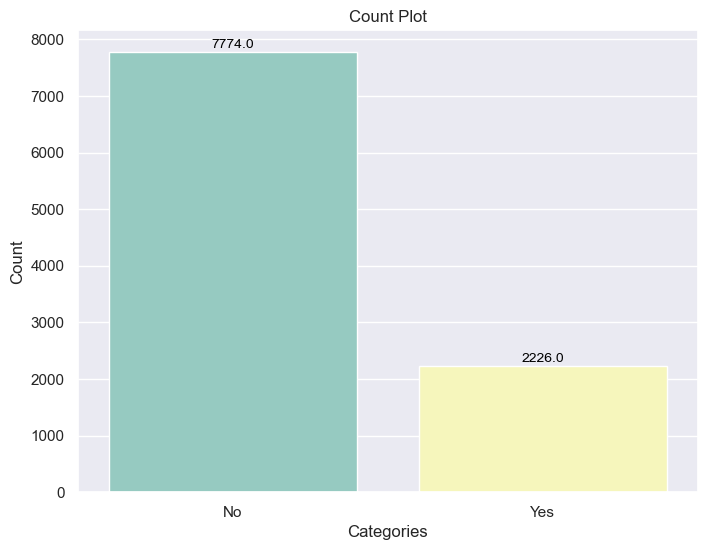

In [10]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x='IsFraud', data=dataset, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [11]:
object_cols = dataset.select_dtypes(include=['object']).columns

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [12]:
from sklearn.utils import resample
dataset = resample(dataset, 
                        replace=True,     # sample with replacement
                        n_samples=40000,    # to match majority class
                        random_state=42) 
dataset

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
7270,41,4,0,0,2,62,830,15235,14960,1,...,0,2,0,1,0,1,0,1,0,0
860,38,3,1,4,2,1,830,32192,5359,5,...,0,0,0,1,0,2,0,1,0,0
5390,56,16,1,1,1,129,773,74309,300000,1,...,0,1,0,1,0,0,0,0,1,0
5191,35,1,1,4,1,1,678,49822,48642,21,...,0,2,0,1,0,2,1,0,0,0
5734,25,13,2,0,2,47,692,43317,2000,10,...,1,0,0,0,0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,36,10,1,0,1,308,830,150000,20358,30,...,0,2,0,1,0,0,0,0,1,0
4564,44,6,2,0,1,29,828,39937,49664,30,...,0,2,0,1,0,2,0,1,0,0
5979,36,6,0,3,1,1,830,150000,300000,28,...,0,2,0,1,0,0,1,0,0,0
8684,24,7,2,1,1,1,768,2930,7854,3,...,0,1,0,1,0,3,0,1,0,0


In [13]:
X=dataset.iloc[:,0:28]

In [14]:
X

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,TimeofTransaction,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral
7270,41,4,0,0,2,62,830,15235,14960,1,...,27,0,2,0,1,0,1,0,1,0
860,38,3,1,4,2,1,830,32192,5359,5,...,8,0,0,0,1,0,2,0,1,0
5390,56,16,1,1,1,129,773,74309,300000,1,...,20,0,1,0,1,0,0,0,0,1
5191,35,1,1,4,1,1,678,49822,48642,21,...,19,0,2,0,1,0,2,1,0,0
5734,25,13,2,0,2,47,692,43317,2000,10,...,2,1,0,0,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,36,10,1,0,1,308,830,150000,20358,30,...,16,0,2,0,1,0,0,0,0,1
4564,44,6,2,0,1,29,828,39937,49664,30,...,8,0,2,0,1,0,2,0,1,0
5979,36,6,0,3,1,1,830,150000,300000,28,...,13,0,2,0,1,0,0,1,0,0
8684,24,7,2,1,1,1,768,2930,7854,3,...,12,0,1,0,1,0,3,0,1,0


In [15]:
y=dataset.iloc[:,-1]

In [16]:
y

7270    0
860     0
5390    0
5191    0
5734    1
       ..
9895    0
4564    0
5979    0
8684    0
3409    0
Name: IsFraud, Length: 40000, dtype: int32

In [17]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)


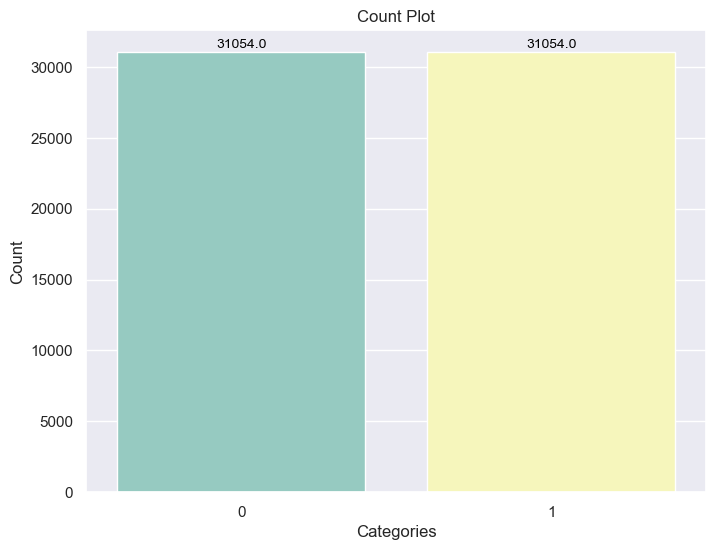

In [18]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x=y, data=dataset, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)

In [20]:
X_train.shape

(49686, 28)

In [21]:
X_test.shape

(12422, 28)

In [22]:
y_train.shape

(49686,)

In [23]:
y_test.shape

(12422,)

In [24]:
#Building a ML Model

In [25]:
labels=['Normal','Fraud']

In [26]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [27]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# KNN

C:\Users\Naveen kumar\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model loaded successfully.
KNN Accuracy    : 80.28497826436967
KNN Precision   : 81.09381071987616
KNN Recall      : 80.1873076034108
KNN FSCORE      : 80.11841126375178

 KNN classification report
               precision    recall  f1-score   support

      Normal       0.72      0.86      0.78      5148
       Fraud       0.88      0.76      0.82      7274

    accuracy                           0.80     12422
   macro avg       0.80      0.81      0.80     12422
weighted avg       0.82      0.80      0.80     12422



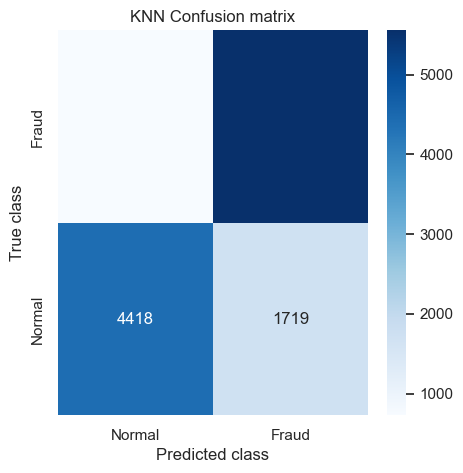

In [28]:
from sklearn.neighbors import KNeighborsClassifier
if os.path.exists('KNN.pkl'):
    # Load the trained model from the file
    clf = joblib.load('KNN.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("KNN", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'KNN.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("KNN", predict, y_test)

# RFC Classifier

C:\Users\Naveen kumar\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Naveen kumar\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model loaded successfully.
Random Forest Classifier Classifier Accuracy    : 99.78264369666721
Random Forest Classifier Classifier Precision   : 99.78110858320855
Random Forest Classifier Classifier Recall      : 99.78481915644235
Random Forest Classifier Classifier FSCORE      : 99.78262168498702

 Random Forest Classifier Classifier classification report
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      6160
       Fraud       1.00      1.00      1.00      6262

    accuracy                           1.00     12422
   macro avg       1.00      1.00      1.00     12422
weighted avg       1.00      1.00      1.00     12422



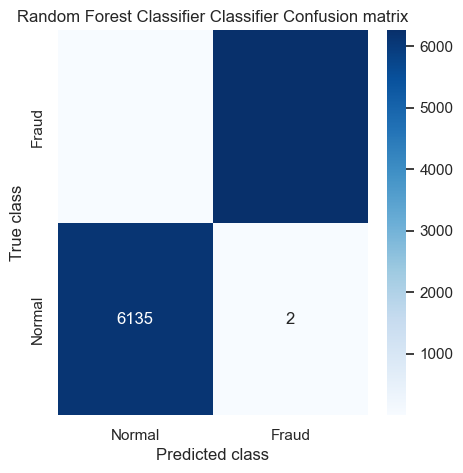

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_path = 'RandomForestClassifier1.pkl'
# Check if the model exists
if os.path.exists(model_path):
    # Load the trained model from the file
    clf = joblib.load(model_path)
    print("Model loaded successfully.")
else:
    # Train the model
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, model_path)
    print("Model saved successfully.")

# Make predictions on the test set
predict = clf.predict(X_test)

# Calculate and print metrics
calculateMetrics("Random Forest Classifier Classifier", predict, y_test)

In [30]:
#showing all algorithms performance values
columns = ["Algorithm Name","Accuracy","Precison","Recall","FScore"]
values = []
algorithm_names = ["KNN", "RFC Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],accuracy[i],precision[i],recall[i],fscore[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Accuracy,Precison,Recall,FScore
0,KNN,80.284978,81.093811,80.187308,80.118411
1,RFC Classifier,99.782644,99.781109,99.784819,99.782622


In [31]:
test=pd.read_csv("test1.csv")
test1=pd.read_csv("test1.csv")

In [32]:
test

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,TimeofTransaction,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral
0,22,Artist,Single,1,Rent,1,821,2574,32622,17,...,02:00,Unusual,On-time,No,Verified,No,Mobile,No,Consistent,Online
1,22,Software Developer,Single,0,Own,62,679,35078,2000,11,...,03:00,Normal,On-time,No,Verified,No,Desktop,No,Inconsistent,Online
2,29,Retired,Single,1,Own,14,799,39309,26084,20,...,11:50,Normal,Late,No,Verified,No,Desktop,No,Inconsistent,Online
3,45,Doctor,Divorced,4,Own,1,830,150000,2000,11,...,14:40,Normal,Late,No,Verified,No,Desktop,No,Consistent,Referral
4,56,Chef,Single,4,Own,24,830,843,26799,3,...,11:50,Normal,On-time,No,Verified,No,Desktop,No,Consistent,Online
5,32,Retired,Single,1,Own,1,830,82921,11171,5,...,09:40,Unusual,On-time,No,Verified,No,Mobile,No,Inconsistent,Online
6,56,Manager,Divorced,2,Own,39,803,16935,300000,30,...,10:50,Normal,On-time,No,Verified,No,Desktop,Yes,Consistent,Referral
7,56,Technician,Single,0,Rent,3,830,54642,4787,25,...,09:00,Normal,On-time,No,Verified,No,Desktop,Yes,Consistent,Online
8,56,Accountant,Divorced,4,Own,224,830,39942,300000,1,...,15:30,Normal,On-time,No,Verified,No,Desktop,No,Consistent,Referral
9,22,Clerk,Single,0,Rent,48,654,3042,71795,22,...,09:00,Unusual,On-time,No,Verified,No,Desktop,Yes,Inconsistent,Online


In [33]:
object_cols = test1.select_dtypes(include=['object']).columns

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    test1[col] = le.fit_transform(test1[col])
predict = clf.predict(test1)

# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i])
        print("Row {}:*************************************NO Fraud Detected".format(i))
        
    else:
        print(test.iloc[i])
        print("Row {}:**************************************Fraud Detected".format(i))
        


Age                                  22
Occupation                       Artist
MaritalStatus                    Single
Dependents                            1
ResidentialStatus                  Rent
AddressDuration                       1
CreditScore                         821
IncomeLevel                        2574
LoanAmountRequested               32622
LoanTerm                             17
PurposeoftheLoan               personal
Collateral                           No
InterestRate                        4.5
PreviousLoans                         1
ExistingLiabilities                   0
ApplicationBehavior              Normal
LocationofApplication             Local
ChangeinBehavior                     No
TimeofTransaction                 02:00
AccountActivity                 Unusual
PaymentBehavior                 On-time
Blacklists                           No
EmploymentVerification         Verified
PastFinancialMalpractices            No
DeviceInformation                Mobile
